In [14]:
import numpy as np

In [15]:
# Exercice 1
def load_data():
    filename = '/Users/mariusavosse/Documents/M2_Paris_Cité/S2/DeepLearing/iap-tp1/tp1-data.csv'
    matrix = np.loadtxt(filename, dtype = 'float64', delimiter=',', unpack = True, usecols = [0,1])
    return matrix

In [16]:
load_data()

array([[  69.,   60.,   39.,   68.,   53.,   67.,   24.,   94.,   58.,
          43.,   28.,   22.,   64.,   48.,   59.,   37.,   91.,   38.,
          39.,   38.,   41.,   53.,   78.,   51.,   24.,   91.,   56.,
          36.,   77.,   64.,   96.,   30.,   23.,   81.,   52.,   98.,
          81.,   82.,   40.,   85.],
       [1926., 1560., 1098., 1980., 1335., 1776.,  687., 2612., 1666.,
        1212.,  738.,  628., 1778., 1378., 1724., 1103., 2471.,  978.,
        1007., 1001., 1110., 1451., 2144., 1462.,  699., 2466., 1570.,
         946., 2083., 1638., 2531.,  837.,  666., 2252., 1352., 2726.,
        2182., 2235., 1055., 2429.]])

In [17]:
x, y = load_data()
type(x)
type(y)
print(x)

[69. 60. 39. 68. 53. 67. 24. 94. 58. 43. 28. 22. 64. 48. 59. 37. 91. 38.
 39. 38. 41. 53. 78. 51. 24. 91. 56. 36. 77. 64. 96. 30. 23. 81. 52. 98.
 81. 82. 40. 85.]


In [18]:
import plotly.express as px
xs, ys = load_data()
fig = px.scatter(x=xs,y=ys)
fig.show()

In [19]:
import pandas as pd 
pd.__version__

'2.2.3'

In [20]:
# Exercice 3
# Fonction de prédiction
def predict(xs, phis):
    phi0, phi1 = phis
    return phi0 + phi1 * xs

In [21]:
# Exercice 4
# Fonction de perte
def loss(y_pred, y_true):
    return np.sum((y_pred - y_true) ** 2)

In [22]:
 # Exemple de données
xs = np.array([1, 2, 3, 4, 5], dtype=np.float64)
ys_true = np.array([2, 4, 6, 8, 10], dtype=np.float64)
phis = np.array([0, 2], dtype=np.float64)  # phi0=0, phi1=2

# Prédictions
ys_pred = predict(xs, phis)
print("Prédictions :", ys_pred)

# Calcul de la perte
total_loss = loss(ys_pred, ys_true)
print("Perte quadratique totale :", total_loss)

Prédictions : [ 2.  4.  6.  8. 10.]
Perte quadratique totale : 0.0


In [23]:
import plotly.express as px

# Initialisation des paramètres
phi0 = 600
phi1 = 10
phis = np.array([phi0, phi1], dtype=np.float64)

# Prédictions initiales
ys_pred = predict(xs, phis)

# Calcul de la perte initiale
total_loss = loss(ys_pred, ys_true)
print("Perte initiale :", total_loss)

# Visualisation
fig = px.scatter(x=xs, y=ys_true, labels={'x': 'Valeur x', 'y': 'Valeur y'}, title="Nuage de points et droite prédite")
fig.add_scatter(x=xs, y=ys_pred, mode='lines', name='Droite prédite')
fig.show()


Perte initiale : 1947520.0


In [24]:
# Meilleures valeurs devinées
phi0_guess = 100  # Exemple de valeur ajustée
phi1_guess = 5    # Exemple de valeur ajustée
phis_guess = np.array([phi0_guess, phi1_guess], dtype=np.float64)

# Nouvelles prédictions
ys_pred_guess = predict(xs, phis_guess)

# Nouvelle perte
new_loss = loss(ys_pred_guess, ys_true)
print("Perte avec paramètres devinés :", new_loss)

# Visualisation avec nouveaux paramètres
fig = px.scatter(x=xs, y=ys_true, labels={'x': 'Valeur x', 'y': 'Valeur y'}, title="Nuage de points et droite ajustée")
fig.add_scatter(x=xs, y=ys_pred_guess, mode='lines', name='Nouvelle droite prédite')
fig.show()


Perte avec paramètres devinés : 59495.0


In [25]:
def loss_gradient(xs, ys, phis):
    """
    Calcule le gradient de la fonction de perte par rapport à phi0 et phi1.
    
    Args:
        xs (np.ndarray): Tableau des valeurs x.
        ys (np.ndarray): Tableau des valeurs y réelles.
        phis (np.ndarray): Tableau contenant [phi0, phi1].
    
    Returns:
        tuple: Dérivées partielles (dL/dphi0, dL/dphi1).
    """
    phi0, phi1 = phis
    n = len(xs)
    preds = predict(xs, phis)
    
    # Gradient par rapport à phi0
    dphi0 = (2 / n) * np.sum(preds - ys)
    
    # Gradient par rapport à phi1
    dphi1 = (2 / n) * np.sum((preds - ys) * xs)
    
    return dphi0, dphi1

# Exemple de test
phi0, phi1 = 600, 10
phis = np.array([phi0, phi1], dtype=np.float64)
dphi0, dphi1 = loss_gradient(xs, ys_true, phis)
print("Gradient pour phi0 :", dphi0)
print("Gradient pour phi1 :", dphi1)


Gradient pour phi0 : 1248.0
Gradient pour phi1 : 3776.0


In [26]:
def step(xs, ys, phis, alpha=1e-6):
    """
    Effectue une étape de descente de gradient.
    
    Args:
        xs (np.ndarray): Tableau des valeurs x.
        ys (np.ndarray): Tableau des valeurs y réelles.
        phis (np.ndarray): Tableau contenant [phi0, phi1].
        alpha (float): Taux d'apprentissage.
    
    Returns:
        np.ndarray: Nouvelles valeurs des paramètres [phi0, phi1].
    """
    dphi0, dphi1 = loss_gradient(xs, ys, phis)
    phi0, phi1 = phis
    
    # Mise à jour des paramètres
    phi0_new = phi0 - alpha * dphi0
    phi1_new = phi1 - alpha * dphi1
    
    return np.array([phi0_new, phi1_new], dtype=np.float64)

# Exemple de test
alpha = 1e-6
new_phis = step(xs, ys_true, phis, alpha)
print("Nouveaux paramètres après une étape :", new_phis)


Nouveaux paramètres après une étape : [599.998752   9.996224]


Étape 1: Perte = 1947520.0000, phis = [599.998752   9.996224]
Étape 2: Perte = 1947440.9225, phis = [599.99750403   9.99244809]
Étape 3: Perte = 1947361.8488, phis = [599.99625608   9.98867227]
Étape 4: Perte = 1947282.7788, phis = [599.99500815   9.98489654]
Étape 5: Perte = 1947203.7125, phis = [599.99376025   9.98112091]
Étape 6: Perte = 1947124.6500, phis = [599.99251238   9.97734536]
Étape 7: Perte = 1947045.5912, phis = [599.99126453   9.9735699 ]
Étape 8: Perte = 1946966.5361, phis = [599.9900167    9.96979454]
Étape 9: Perte = 1946887.4848, phis = [599.98876891   9.96601926]
Étape 10: Perte = 1946808.4372, phis = [599.98752113   9.96224407]


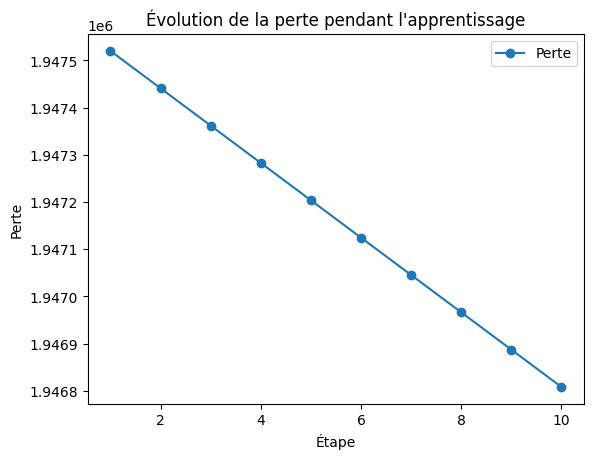

In [28]:
import plotly.graph_objects as go

# Initialisation des paramètres
phi0, phi1 = 600, 10
phis = np.array([phi0, phi1], dtype=np.float64)
alpha = 1e-6
num_steps = 10

# Stockage des pertes pour visualisation
losses = []

# Visualisation initiale
fig = go.Figure()

for step_num in range(num_steps):
    # Calcul des prédictions et de la perte
    ys_pred = predict(xs, phis)
    current_loss = loss(ys_pred, ys_true)
    losses.append(current_loss)
    
    # Visualisation de la droite
    fig.add_trace(go.Scatter(x=xs, y=ys_pred, mode='lines', name=f'Étape {step_num+1}'))
    
    # Mise à jour des paramètres
    phis = step(xs, ys_true, phis, alpha)

    print(f"Étape {step_num+1}: Perte = {current_loss:.4f}, phis = {phis}")

# Nuage de points des données
fig.add_trace(go.Scatter(x=xs, y=ys_true, mode='markers', name='Données réelles'))

# Affichage des droites
fig.update_layout(
    title="Évolution des droites prédites pendant l'apprentissage",
    xaxis_title="x",
    yaxis_title="y",
)
fig.show()

# Affichage des pertes
import matplotlib.pyplot as plt

plt.plot(range(1, num_steps + 1), losses, marker='o', label="Perte")
plt.xlabel("Étape")
plt.ylabel("Perte")
plt.title("Évolution de la perte pendant l'apprentissage")
plt.legend()
plt.show()


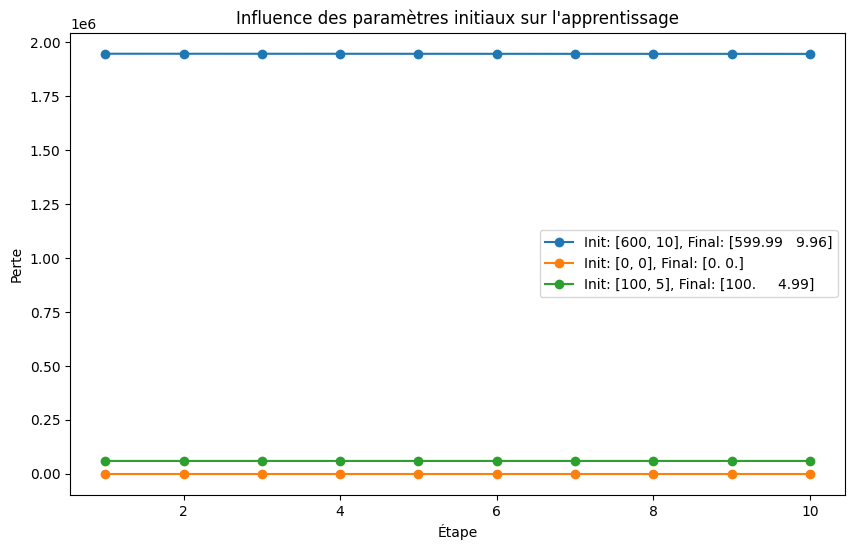

In [29]:
# Fonction pour effectuer plusieurs itérations de descente de gradient
def gradient_descent(xs, ys, phis, alpha, num_steps):
    """
    Effectue plusieurs étapes de descente de gradient.
    
    Args:
        xs (np.ndarray): Tableau des valeurs x.
        ys (np.ndarray): Tableau des valeurs y réelles.
        phis (np.ndarray): Tableau initial contenant [phi0, phi1].
        alpha (float): Taux d'apprentissage.
        num_steps (int): Nombre d'étapes de descente de gradient.
    
    Returns:
        tuple: Derniers paramètres et liste des pertes à chaque étape.
    """
    losses = []
    for step_num in range(num_steps):
        ys_pred = predict(xs, phis)
        current_loss = loss(ys_pred, ys)
        losses.append(current_loss)
        phis = step(xs, ys, phis, alpha)
    return phis, losses

# Paramètres initiaux à tester
initial_params = [
    [600, 10],  # Mauvais choix initial
    [0, 0],     # Neutre
    [100, 5],   # Devination correcte
]

# Comparaison des performances
plt.figure(figsize=(10, 6))
for params in initial_params:
    phis = np.array(params, dtype=np.float64)
    final_phis, losses = gradient_descent(xs, ys_true, phis, alpha, num_steps)
    plt.plot(range(1, num_steps + 1), losses, marker='o', label=f"Init: {params}, Final: {final_phis.round(2)}")

plt.xlabel("Étape")
plt.ylabel("Perte")
plt.title("Influence des paramètres initiaux sur l'apprentissage")
plt.legend()
plt.show()


In [30]:
def analytical_solution(xs, ys):
    """
    Trouve la solution analytique pour la régression linéaire.
    
    Args:
        xs (np.ndarray): Tableau des valeurs x.
        ys (np.ndarray): Tableau des valeurs y réelles.
    
    Returns:
        np.ndarray: Paramètres [phi0, phi1].
    """
    # Construction de la matrice A (ajout d'une colonne de 1 pour phi0)
    A = np.vstack([np.ones_like(xs), xs]).T
    
    # Résolution du problème de régression linéaire
    phis, residuals, rank, s = np.linalg.lstsq(A, ys, rcond=None)
    
    return phis

# Solution analytique
phis_analytical = analytical_solution(xs, ys_true)
print("Paramètres analytiques :", phis_analytical)

# Calcul de la perte associée
ys_pred_analytical = predict(xs, phis_analytical)
loss_analytical = loss(ys_pred_analytical, ys_true)
print("Perte analytique :", loss_analytical)


Paramètres analytiques : [7.29046784e-16 2.00000000e+00]
Perte analytique : 2.3665827156630354e-30


In [31]:
def check_gradient(xs, ys, phis, epsilon=1e-7):
    """
    Vérifie les gradients calculés analytiquement en les comparant à des approximations numériques.
    
    Args:
        xs (np.ndarray): Tableau des valeurs x.
        ys (np.ndarray): Tableau des valeurs y réelles.
        phis (np.ndarray): Tableau contenant [phi0, phi1].
        epsilon (float): Petit nombre pour l'approximation.
    
    Returns:
        dict: Dérivées analytiques et approximées pour phi0 et phi1.
    """
    # Gradients analytiques
    dphi0_analytical, dphi1_analytical = loss_gradient(xs, ys, phis)
    
    # Approximation numérique pour phi0
    phis_plus = np.array([phis[0] + epsilon, phis[1]])
    phis_minus = np.array([phis[0] - epsilon, phis[1]])
    loss_plus = loss(predict(xs, phis_plus), ys)
    loss_minus = loss(predict(xs, phis_minus), ys)
    dphi0_numerical = (loss_plus - loss_minus) / (2 * epsilon)
    
    # Approximation numérique pour phi1
    phis_plus = np.array([phis[0], phis[1] + epsilon])
    phis_minus = np.array([phis[0], phis[1] - epsilon])
    loss_plus = loss(predict(xs, phis_plus), ys)
    loss_minus = loss(predict(xs, phis_minus), ys)
    dphi1_numerical = (loss_plus - loss_minus) / (2 * epsilon)
    
    return {
        "dphi0_analytical": dphi0_analytical,
        "dphi0_numerical": dphi0_numerical,
        "dphi1_analytical": dphi1_analytical,
        "dphi1_numerical": dphi1_numerical,
    }

# Vérification des gradients
phis_test = np.array([600, 10], dtype=np.float64)
gradient_check = check_gradient(xs, ys_true, phis_test)
print("Vérification des gradients :")
for key, value in gradient_check.items():
    print(f"{key}: {value}")


Vérification des gradients :
dphi0_analytical: 1248.0
dphi0_numerical: 6239.997455850244
dphi1_analytical: 3776.0
dphi1_numerical: 18879.99940663576
